<a href="https://colab.research.google.com/github/swarna987456/Amazpn_Reviews_SA/blob/main/Amazon_Reviews_Food_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data importing

In [ ]:
#now we will import the dataset from kaggle using API
#First upload the API KEY file from your local machine from here or directly on colab
from google.colab import files
files.upload()

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

100% 241M/242M [00:02<00:00, 125MB/s]
100% 242M/242M [00:02<00:00, 117MB/s]


In [ ]:
#unzip the kaggle dataset
!unzip /content/amazon-fine-food-reviews.zip && rm /content/amazon-fine-food-reviews.zip

Archive:  /content/amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import nltk

In [ ]:
#lets read the data
#This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.
df = pd.read_csv('Reviews.csv')

In [ ]:
df.shape #half million reviews, so lets work with only 1k views sample

(568454, 10)

In [ ]:
df_sample = df.sample(1000,random_state = 24).reset_index(drop = True)

In [ ]:
df_sample.shape

(1000, 10)

In [ ]:
df_sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,207920,B000CQID2Y,AYI1BCOMQXSWI,T. Gardner,2,2,5,1264809600,My favorite peppermint tea,Perfect tea for right before bedtime relaxing....
1,469007,B000LKZ91Y,A6X2WHNACK187,"RMC ""RMC""",0,0,5,1325808000,Took a chance with one more rice pasta... and ...,"I found this product discounted 50%, so I took..."
2,177234,B0030VJ8E0,ADQ3WYHFRWVLM,ncav2011,0,0,5,1340668800,Fantastic,My son loves this food combination and eats it...
3,311955,B000EVG8HE,A2M1JWNG93F97F,Oraclemaster,0,0,5,1280707200,Best glutenf-ree pancake mix we have tried,Our family loves this pancake and waffle mix. ...
4,544697,B001P3PR54,A1R4YC4O5R2Z6G,"Movie fan ""movie fan""",1,1,5,1270166400,good product,These chews are supposed to clean teeth. They...


### EDA

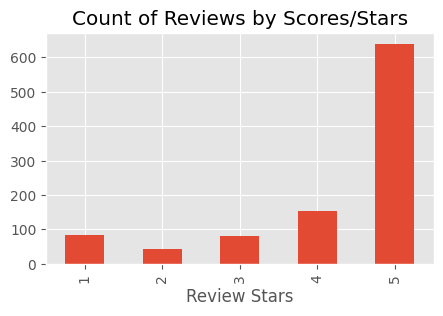

In [ ]:
ax = df_sample['Score'].value_counts().sort_index()\
                  .plot(kind = 'bar', title = 'Count of Reviews by Scores/Stars',
                        figsize = (5,3))
ax.set_xlabel('Review Stars')
plt.show()


Based on the above barplot, we understood that scores are biased towards positivity, means there are more number of positive reviews than negative

In [ ]:
df_sample.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

NLTK

In [ ]:
example = df_sample['Text'][0]
example

'Perfect tea for right before bedtime relaxing. Have been enjoying stash peppermint tea for years.'

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = nltk.word_tokenize(example)
tokens

['Perfect',
 'tea',
 'for',
 'right',
 'before',
 'bedtime',
 'relaxing',
 '.',
 'Have',
 'been',
 'enjoying',
 'stash',
 'peppermint',
 'tea',
 'for',
 'years',
 '.']

In [ ]:
#pos tag of each word
nltk.download('averaged_perceptron_tagger')
pos_tagged = nltk.pos_tag(tokens)
pos_tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Perfect', 'NNP'),
 ('tea', 'NN'),
 ('for', 'IN'),
 ('right', 'NN'),
 ('before', 'IN'),
 ('bedtime', 'JJ'),
 ('relaxing', 'NN'),
 ('.', '.'),
 ('Have', 'VBP'),
 ('been', 'VBN'),
 ('enjoying', 'VBG'),
 ('stash', 'JJ'),
 ('peppermint', 'NN'),
 ('tea', 'NN'),
 ('for', 'IN'),
 ('years', 'NNS'),
 ('.', '.')]

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.7 MB/s eta 0:00:00


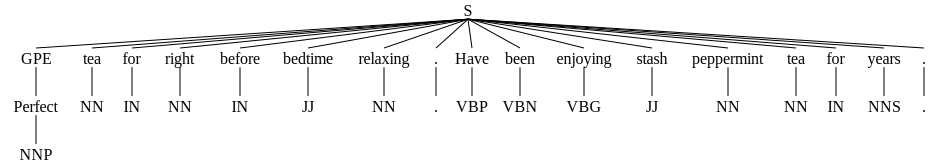

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
!pip install svgling
import svgling

nltk.chunk.ne_chunk(pos_tagged)

Step1: VADER Sentiment Scoring

In [ ]:
#nltk;s SentimentIntensityAnalyser:
#it uses Bag of Words approach and stop words will be removed
#each word is scored and combined a total score

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#creating instance
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia

In [ ]:
sia.polarity_scores('She is a good player')

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [ ]:
sia.polarity_scores('She is an excellent player')

{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.8834}

In [ ]:
df_sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,207920,B000CQID2Y,AYI1BCOMQXSWI,T. Gardner,2,2,5,1264809600,My favorite peppermint tea,Perfect tea for right before bedtime relaxing....
1,469007,B000LKZ91Y,A6X2WHNACK187,"RMC ""RMC""",0,0,5,1325808000,Took a chance with one more rice pasta... and ...,"I found this product discounted 50%, so I took..."
2,177234,B0030VJ8E0,ADQ3WYHFRWVLM,ncav2011,0,0,5,1340668800,Fantastic,My son loves this food combination and eats it...
3,311955,B000EVG8HE,A2M1JWNG93F97F,Oraclemaster,0,0,5,1280707200,Best glutenf-ree pancake mix we have tried,Our family loves this pancake and waffle mix. ...
4,544697,B001P3PR54,A1R4YC4O5R2Z6G,"Movie fan ""movie fan""",1,1,5,1270166400,good product,These chews are supposed to clean teeth. They...


In [ ]:
df_sample = df_sample.drop(columns = ['Id']).reset_index().rename(columns = {'index':'Id'})

In [ ]:
#run the polarity scores for entire dataset
res = {}
for i,j in zip(df_sample.Text,range(len(df_sample))):
  res[j] = sia.polarity_scores(i)

In [ ]:
vaders = pd.DataFrame(res).T.reset_index().\
              rename(columns={'index':'Id'})

vaders = vaders.merge(df_sample, how ='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0.000,0.538,0.462,0.8834,B000CQID2Y,AYI1BCOMQXSWI,T. Gardner,2,2,5,1264809600,My favorite peppermint tea,Perfect tea for right before bedtime relaxing....
1,1,0.117,0.692,0.191,0.3640,B000LKZ91Y,A6X2WHNACK187,"RMC ""RMC""",0,0,5,1325808000,Took a chance with one more rice pasta... and ...,"I found this product discounted 50%, so I took..."
2,2,0.078,0.738,0.184,0.7057,B0030VJ8E0,ADQ3WYHFRWVLM,ncav2011,0,0,5,1340668800,Fantastic,My son loves this food combination and eats it...
3,3,0.071,0.821,0.108,0.7579,B000EVG8HE,A2M1JWNG93F97F,Oraclemaster,0,0,5,1280707200,Best glutenf-ree pancake mix we have tried,Our family loves this pancake and waffle mix. ...
4,4,0.000,0.686,0.314,0.7506,B001P3PR54,A1R4YC4O5R2Z6G,"Movie fan ""movie fan""",1,1,5,1270166400,good product,These chews are supposed to clean teeth. They...


<ipython-input-29-cd0e20549669>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = vaders, x = 'Score', y = 'compound',palette='hls')


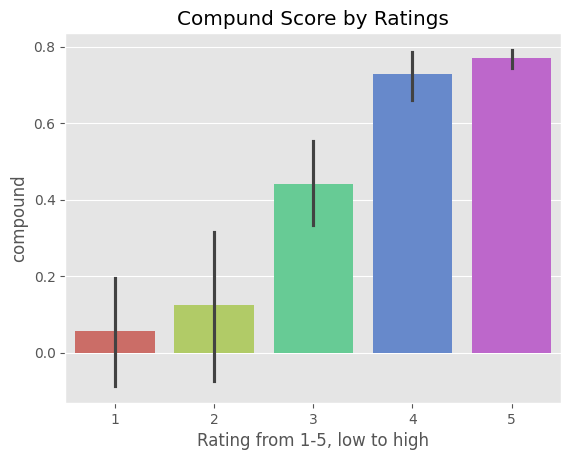

In [ ]:
#ploting results
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound',palette='hls')
ax.set_title("Compund Score by Ratings")
ax.set_xlabel("Rating from 1-5, low to high")
plt.show()

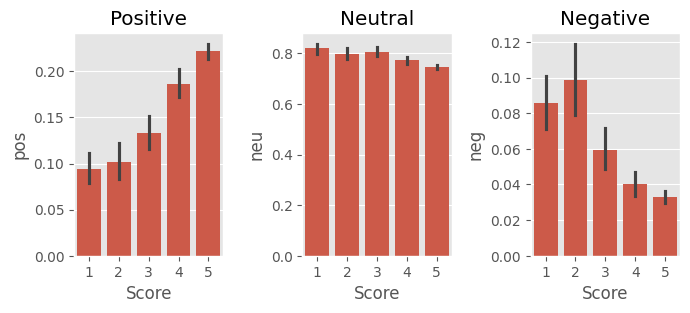

In [ ]:
#comparing different scores with ratings

fig,ax = plt.subplots(1,3, figsize=(7,3))
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = ax[0])
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = ax[1])
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax = ax[2])
plt.tight_layout()
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.show()

2. Pretrained- Roberta Model:

Transformer model accounts for the words but also the context related to other words.

In [ ]:
sns

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

In [ ]:
from transformers import AutoTokenizer #for tokenizing text
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

https://huggingface.co/transformers/v3.0.2/model_doc/auto.html#tfautomodelforsequenceclassification

In [ ]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
tokenizer

RobertaTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-sentiment', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [ ]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
example

'Perfect tea for right before bedtime relaxing. Have been enjoying stash peppermint tea for years.'

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.8834}

In [ ]:
encoded_text = tokenizer(example,return_tensors = 'pt')
encoded_text #we have two keys, while passing through
# model we will upack them **

{'input_ids': tensor([[    0, 42370,  6845,    13,   235,   137,  3267,   958, 19448,     4,
          6319,    57,  6218, 34954, 10702, 30732,  6845,    13,   107,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
output  = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.9588, -0.1371,  3.6988]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
scores = output[0][0].detach().numpy()
scores
#You're extracting a specific element (often the first prediction) from the model's potentially complex output.
#You're ensuring you get the raw numerical values and not a tensor with gradients attached (assuming you don't need gradients for this step).
#You're converting the data to a NumPy array for compatibility with other tools.

array([-2.9587774 , -0.13709956,  3.6988125 ], dtype=float32)

In [ ]:
#finding softmax scores
scores = softmax(scores)

In [ ]:
scores

array([0.00125553, 0.0210992 , 0.9776453 ], dtype=float32)

In [ ]:
#run Ro-berta model on all the values
def scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors = 'pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]
  }
  return scores_dict

In [ ]:
scores_roberta(example)

{'roberta_neg': 0.0012555289,
 'roberta_neu': 0.021099197,
 'roberta_pos': 0.9776453}

In [ ]:
#run the polarity scores for entire dataset
res_roberta = {}
for i,j in zip(df_sample.Text,range(len(df_sample))):
  try:
    res_roberta[j] = scores_roberta(i)
  except RuntimeError:
    print(f'Broke for index {j}')

Broke for index 65
Broke for index 123
Broke for index 172
Broke for index 220
Broke for index 255
Broke for index 497
Broke for index 651
Broke for index 658
Broke for index 838
Broke for index 883
Broke for index 891
Broke for index 915
Broke for index 932
Broke for index 991


In [ ]:
res_roberta = pd.DataFrame(res_roberta).T.reset_index().\
              rename(columns={'index':'Id'})
res_roberta

,Id,roberta_neg,roberta_neu,roberta_pos
0,0,0.001256,0.021099,0.977645
1,1,0.020047,0.061136,0.918817
2,2,0.003564,0.021329,0.975107
3,3,0.003650,0.023141,0.973209
4,4,0.012619,0.066012,0.921369
...,...,...,...,...
981,995,0.041332,0.272077,0.686591
982,996,0.008727,0.042639,0.948634
983,997,0.035701,0.130611,0.833688
984,998,0.001908,0.008306,0.989786


In [ ]:
res_roberta = res_roberta.merge(vaders, how = 'left')

In [ ]:
res_roberta.shape # 14 were skipped due to large size

(986, 17)

In [ ]:
res_roberta.head(1)

,Id,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0.001256,0.021099,0.977645,0.0,0.538,0.462,0.8834,B000CQID2Y,AYI1BCOMQXSWI,T. Gardner,2,2,5,1264809600,My favorite peppermint tea,Perfect tea for right before bedtime relaxing....


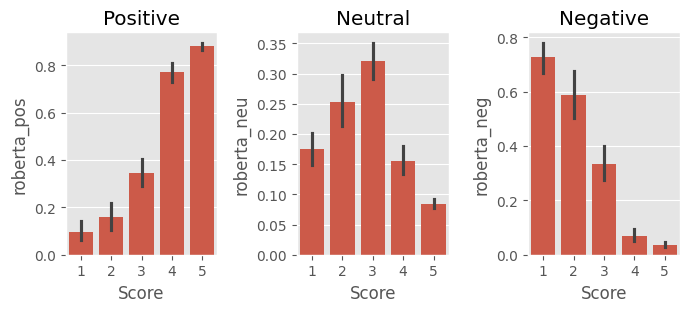

In [ ]:
#comparing different scores with ratings

fig,ax = plt.subplots(1,3, figsize=(7,3))
sns.barplot(data = res_roberta, x = 'Score', y = 'roberta_pos', ax = ax[0])
sns.barplot(data = res_roberta, x = 'Score', y = 'roberta_neu', ax = ax[1])
sns.barplot(data = res_roberta, x = 'Score', y = 'roberta_neg', ax = ax[2])
plt.tight_layout()
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.show()

In [ ]:
res_roberta.to_csv('final_output.csv',index = False)


In [ ]:
res_roberta = pd.read_csv('final_output.csv')

In [ ]:
res_roberta.head()

,Id,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0.001256,0.021099,0.977645,0.000,0.538,0.462,0.8834,B000CQID2Y,AYI1BCOMQXSWI,T. Gardner,2,2,5,1264809600,My favorite peppermint tea,Perfect tea for right before bedtime relaxing....
1,1,0.020047,0.061136,0.918817,0.117,0.692,0.191,0.3640,B000LKZ91Y,A6X2WHNACK187,"RMC ""RMC""",0,0,5,1325808000,Took a chance with one more rice pasta... and ...,"I found this product discounted 50%, so I took..."
2,2,0.003564,0.021329,0.975107,0.078,0.738,0.184,0.7057,B0030VJ8E0,ADQ3WYHFRWVLM,ncav2011,0,0,5,1340668800,Fantastic,My son loves this food combination and eats it...
3,3,0.003650,0.023141,0.973209,0.071,0.821,0.108,0.7579,B000EVG8HE,A2M1JWNG93F97F,Oraclemaster,0,0,5,1280707200,Best glutenf-ree pancake mix we have tried,Our family loves this pancake and waffle mix. ...
4,4,0.012619,0.066012,0.921369,0.000,0.686,0.314,0.7506,B001P3PR54,A1R4YC4O5R2Z6G,"Movie fan ""movie fan""",1,1,5,1270166400,good product,These chews are supposed to clean teeth. They...


In [ ]:
#Review examples
#positive 1 and negative 5 star reviews
res_roberta.query('Score==1').sort_values(by = 'pos',ascending = False)['Text'].values[0]

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

In [ ]:
res_roberta.query('Score==1').sort_values(by = 'roberta_pos',ascending = False)['Text'].values[0]

"When I bought this product, I had no idea of the ingredients.  The first ingredient is sugar and the second is some kind of hydrogenated oil.  I hadn't read the ingredients until after I made it.  Honestly it is delicious but I knew this was way more than just coffee!  I gave it away to t he friend who had recommended it to me!  It is only 70 calories she said!~"

In [ ]:
res_roberta.query('Score==5').sort_values(by = 'neg',ascending = False)['Text'].values[0]

'Hubby loves nuts and I heard pistachio has the lowest calories in all nuts. We order this once a month.'

In [ ]:
res_roberta['roberta_neg'][0],res_roberta['roberta_neu'][0],res_roberta['roberta_pos'][0]

(0.0012555289, 0.021099197, 0.9776453)

In [ ]:
res_roberta.query('Score==3').sort_values(by = 'roberta_neu',ascending = False)

,Id,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
163,165,0.194327,0.599979,0.205694,0.000,0.878,0.122,0.4404,B000E1DS8Q,A2PLFXJLG1W7F5,"Sam Anker ""BILSKI""",0,2,3,1250553600,MORE FLAVORS IN THIS SIZE,I WOULD LIKE TO BE ABLE TO BUY CHOC. JELLO COO...
216,219,0.341027,0.563100,0.095873,0.089,0.911,0.000,-0.3491,B002OL2MWM,A32SJOMI0V3YIB,Sonya,0,1,3,1310601600,Looks nice,"You can taste that the wine is ""fuller"" becaus..."
480,485,0.056503,0.560939,0.382558,0.000,1.000,0.000,0.0000,B0029XDZDK,AKGFVTLAR1ALQ,Sandra Rueda,1,2,3,1279497600,Jet Fuel much stronger,I wanted an alternative to Jet Fuel just to va...
358,363,0.324045,0.544735,0.131220,0.055,0.913,0.032,-0.3506,B0028A8ZEI,A3PH51ANO0DAEC,Natasha,0,1,3,1335052800,Change in size of product,I have been receiving Peanut Shoppe of William...
223,227,0.292038,0.513368,0.194594,0.014,0.930,0.057,0.5777,B0025UC2DQ,A25B9A3NZR8EVG,"James Chaffin ""Bachelor Cook""",0,1,3,1318032000,Super Sugar,"I am not a fan of artificial sweeteners, but m..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,723,0.949130,0.046522,0.004349,0.112,0.888,0.000,-0.3412,B002DHTWNO,A3R8A3Q641HUF5,"nsm105 ""Nick""",0,0,3,1252108800,Wild Ride Beef Jerky,Not as good as some of the other beef jerky br...
640,646,0.005601,0.044297,0.950102,0.000,0.873,0.127,0.4404,B000UUA7K8,A3ANMCMSCLAOLV,"Donna Patton ""MI fan""",1,1,3,1234137600,Disappointed,The buble gum arrived very quickly so that is ...
570,576,0.007781,0.037530,0.954689,0.057,0.757,0.186,0.7003,B000E3XCGM,A3W2IG60XR160V,"G. ellis ""g.e..""",2,4,3,1283385600,Wish they had low sodium line,I love most of the Zatarains products.<br />Ju...
264,269,0.963987,0.032798,0.003215,0.202,0.798,0.000,-0.7245,B004JR6BSU,A2DTANWSXAZ50R,"BU Bag Lady ""bubaglady""",0,0,3,1331251200,Haltex Sugar Free Lemon,The lemon has something in it that burns the t...


<Axes: xlabel='compound', ylabel='Count'>

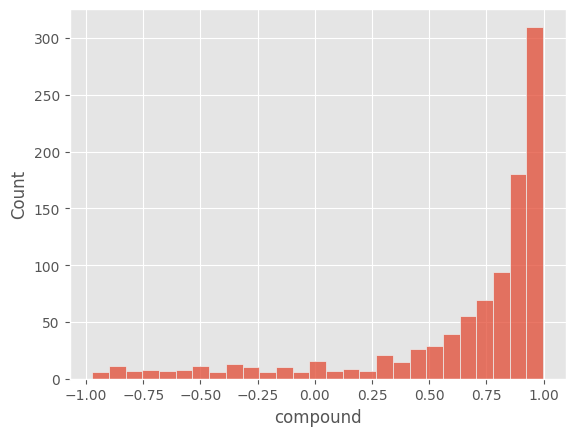

In [ ]:
sns.histplot(res_roberta['compound'])

note from https://github.com/cjhutto/vaderSentiment
It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05

In [ ]:
#sentiment of vaders model

compound_sent = []
for score in res_roberta['compound']:
  if score > 0.05:
    compound_sent.append('Positive')
  elif score > -0.05:  # Check only if greater than -0.5 (neutral)
    compound_sent.append('Neutral')
  else:
    compound_sent.append('Negative')


In [ ]:
res_roberta['compound_sent'] = compound_sent

In [ ]:
res_roberta['compound_sent'].value_counts()

compound_sent
Positive    861
Negative    105
Neutral      20
Name: count, dtype: int64

In [ ]:
res_roberta['Score'].value_counts().sort_index()

Score
1     82
2     42
3     82
4    146
5    634
Name: count, dtype: int64

In [ ]:
def calculate_compound_score(i):
  sentiment_probs = np.array([res_roberta['roberta_neg'][i],res_roberta['roberta_neu'][i],res_roberta['roberta_pos'][i]])
  weights = np.array([-1,0,1],dtype = np.float32)
  return np.dot(sentiment_probs,weights)

In [ ]:
calculate_compound_score(265)

0.31652164

In [ ]:
roberta_compound = []
for i in range(len(res_roberta)):
  roberta_compound.append(calculate_compound_score(i))

In [ ]:
res_roberta['roberta_compound']=roberta_compound

In [ ]:
#sentiment of vaders model

roberta_compound_sent = []
for score in res_roberta['roberta_compound']:
  if score > 0.05:
    roberta_compound_sent.append('Positive')
  elif score > -0.05:  # Check only if greater than -0.5 (neutral)
    roberta_compound_sent.append('Neutral')
  else:
    roberta_compound_sent.append('Negative')


res_roberta['roberta_compound_sent']=roberta_compound_sent

In [ ]:
res_roberta.head()

,Id,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound_sent,roberta_compound,roberta_compound_sent
0,0,0.001256,0.021099,0.977645,0.000,0.538,0.462,0.8834,B000CQID2Y,AYI1BCOMQXSWI,T. Gardner,2,2,5,1264809600,My favorite peppermint tea,Perfect tea for right before bedtime relaxing....,Positive,0.976390,Positive
1,1,0.020047,0.061136,0.918817,0.117,0.692,0.191,0.3640,B000LKZ91Y,A6X2WHNACK187,"RMC ""RMC""",0,0,5,1325808000,Took a chance with one more rice pasta... and ...,"I found this product discounted 50%, so I took...",Positive,0.898770,Positive
2,2,0.003564,0.021329,0.975107,0.078,0.738,0.184,0.7057,B0030VJ8E0,ADQ3WYHFRWVLM,ncav2011,0,0,5,1340668800,Fantastic,My son loves this food combination and eats it...,Positive,0.971543,Positive
3,3,0.003650,0.023141,0.973209,0.071,0.821,0.108,0.7579,B000EVG8HE,A2M1JWNG93F97F,Oraclemaster,0,0,5,1280707200,Best glutenf-ree pancake mix we have tried,Our family loves this pancake and waffle mix. ...,Positive,0.969559,Positive
4,4,0.012619,0.066012,0.921369,0.000,0.686,0.314,0.7506,B001P3PR54,A1R4YC4O5R2Z6G,"Movie fan ""movie fan""",1,1,5,1270166400,good product,These chews are supposed to clean teeth. They...,Positive,0.908751,Positive


In [ ]:
res_roberta['roberta_compound_sent'].value_counts()

roberta_compound_sent
Positive    796
Negative    176
Neutral      14
Name: count, dtype: int64

In [ ]:
res_roberta['compound_sent'].value_counts()

compound_sent
Positive    861
Negative    105
Neutral      20
Name: count, dtype: int64

In [ ]:
res_roberta['Score'].value_counts().sort_index()

Score
1     82
2     42
3     82
4    146
5    634
Name: count, dtype: int64

In [ ]:
res_roberta.query('Score==1').sort_values(by = 'neg',ascending = False)

,Id,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound_sent,roberta_compound,roberta_compound_sent
430,435,0.949068,0.044291,0.006641,0.319,0.649,0.032,-0.9572,B000FKL0EU,A20LEW28TNSY0K,"Justin Harvey ""Justus""",2,2,1,1338940800,RUINED - DISGUSTING,I fully agree with the last few reviews. Altoi...,Negative,-0.942427,Negative
418,423,0.925465,0.064609,0.009926,0.269,0.637,0.094,-0.5699,B004CU2T12,AX8VRQY67YHMP,John Mike,0,1,1,1328400000,Too salty,These are one of my least favorite types of pi...,Negative,-0.915538,Negative
730,738,0.973492,0.023303,0.003205,0.265,0.662,0.073,-0.7572,B002CPVTH4,A2KMJITYA2O20T,Denis,2,7,1,1325116800,By far the worst tasting protein I have ever had,"Without a doubt, Hemp Pro 70 is the worst tast...",Negative,-0.970287,Negative
669,677,0.813292,0.153828,0.032880,0.248,0.643,0.110,-0.8994,B007TJGZ5E,A2ZSYINLY6M7HP,Val,2,6,1,1309392000,Yuk!,I hated this K-cup and couldn't wait to be don...,Negative,-0.780412,Negative
657,665,0.915385,0.073586,0.011029,0.230,0.696,0.074,-0.9044,B001CCU848,A1QMHRD9RKWG2R,Auntie M,1,2,1,1265846400,Worst Coffee Ever!,My office just switched over to the Wolfgang P...,Negative,-0.904356,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,444,0.702387,0.267647,0.029966,0.000,0.865,0.135,0.3818,B00008JOL0,A3QZ6JT0R1OWEC,"M. Goldman ""M_gold~""",1,2,1,1336780800,Tastes like chemicals...my Shih tzu & Pekinges...,"Yes, I tasted them - they taste like chemicals...",Positive,-0.672421,Negative
360,365,0.264545,0.387585,0.347870,0.000,0.885,0.115,0.3818,B000VK6TKO,A38Z30KAT7J1PS,"yojimko ""Alex""",2,3,1,1261267200,sitting on the shelf too long.,"This was not a ""fresh"" product. My cats (nine...",Positive,0.083325,Positive
93,94,0.674635,0.277862,0.047503,0.000,0.737,0.263,0.7574,B0026WL1F8,A2RNYW2HIQBGSM,Carlos Alvarez,1,5,1,1229990400,Worst meat snack I ever tried,They taste more like chemicals than meat. I l...,Positive,-0.627132,Negative
26,26,0.914576,0.077489,0.007935,0.000,1.000,0.000,0.0000,B000BI7OGE,A2UGD2MTZC2D93,Kurt W. Schsuter,0,6,1,1268784000,WTF,These are not pods!! They are proprietary pla...,Neutral,-0.906641,Negative


In [ ]:
res_roberta.to_csv('final_output_v2.csv',index = False)

Extra: The Transformers Pipeline

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sent_pipeline("Do you think I like maggi?")

[{'label': 'POSITIVE', 'score': 0.6180676221847534}]

In [ ]:
sent_pipeline("I think its not fair")

[{'label': 'NEGATIVE', 'score': 0.9997656941413879}]

In [ ]:
roberta_sent_pipeline = pipeline(model = f"cardiffnlp/twitter-roberta-base-sentiment")

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
roberta_sent_pipeline("I think its not fair")

[{'label': 'LABEL_0', 'score': 0.9553991556167603}]